In [124]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [125]:
fb = pd.read_csv("./FB.csv")
twMAU = pd.read_csv("./TwitterMAU.csv")
tw = pd.read_csv("./Tw.csv")

In [126]:
twMAU = twMAU.iloc[::-1]

In [127]:
fb = fb.iloc[::-1]

In [128]:
def fixQuarter(quarter : str, social : str):
    data = quarter.split(" ")
    
    if social == 'fb':
        data = data[:-1]
    
    return data[0] + "'" + data[1][-2:]

def fixTwQuarter(quarter : str):
    data = quarter.split(" ")
    

fb['quarter'] = fb['quarter'].apply(lambda quarter: fixQuarter(quarter, 'fb'))
twMAU['quarter'] = twMAU['quarter'].apply(lambda quarter: fixQuarter(quarter, 'Tw'))

In [129]:
pd.merge(tw, twMAU, on="quarter")

,quarter,DAU,MAU
0,Q1'17,109,327.0
1,Q2'17,110,326.0
2,Q3'17,114,330.0
3,Q4'17,115,330.0
4,Q1'18,120,336.0
5,Q2'18,122,335.0
6,Q3'18,124,326.0
7,Q4'18,126,321.0
8,Q1'19,134,330.0


<AxesSubplot:xlabel='quarter', ylabel='DAU'>

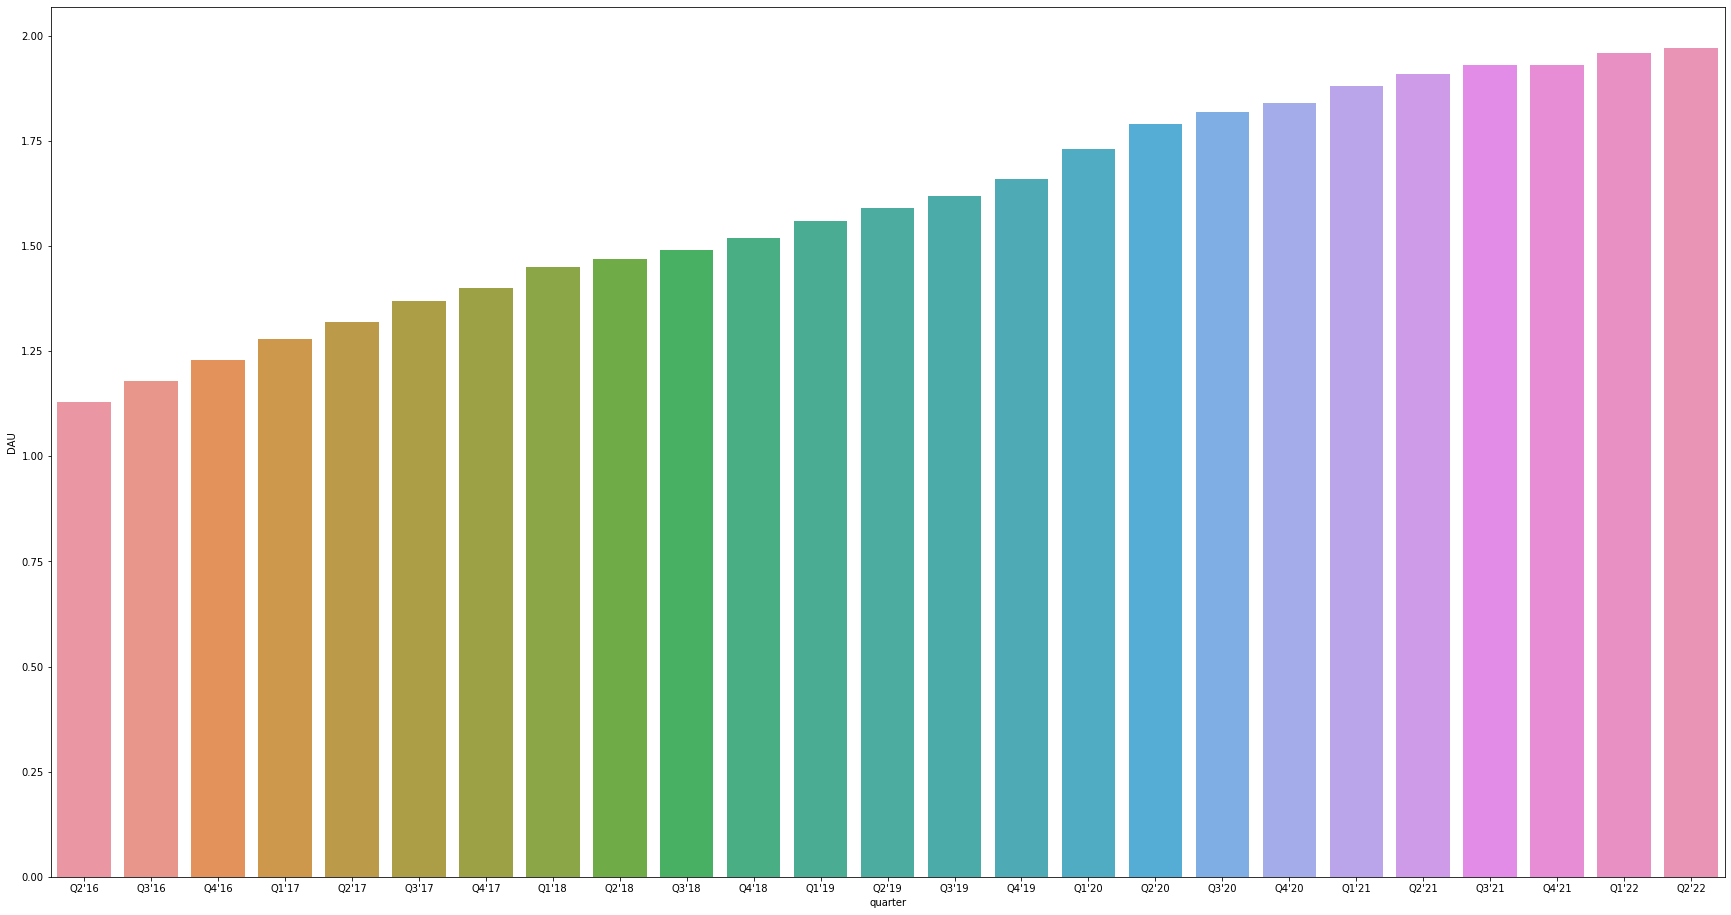

In [130]:
plt.figure(figsize=(30, 16))
sns.barplot(x = 'quarter', y = 'DAU', data=fb)

In [131]:
# dataframe with corrected indexing...
newTwitterMAU = pd.DataFrame(twMAU.iloc[:,:].values,columns=["quarter","MAU"])

In [132]:
# finding appropriate time indices:
print(len(newTwitterMAU['MAU']))
n = len(newTwitterMAU['MAU'])

time_col_values = []
    
if n%2 == 0:
    time_col_values = [x for x in range(-(n-1),n,2)]
else:
    time_col_values = [x for x in range(-(n//2),(n//2)+1)]
    

33


In [133]:
type(time_col_values)

list

In [134]:
import numpy as np

# adding the time dummy:
newTwitterMAU['time'] = np.arange(len(newTwitterMAU.index)) #better option :')

# newTwitterMAU['time'] = time_col_values 

# updated dataframe
# print(newTwitterMAU)

In [135]:
newTwitterMAU

,quarter,MAU,time
0,Q1'11,68.0,0
1,Q2'11,85.0,1
2,Q3'11,101.0,2
3,Q4'11,117.0,3
4,Q1'12,138.0,4
5,Q2'12,151.0,5
6,Q3'12,167.0,6
7,Q4'12,185.0,7
8,Q1'13,204.0,8
9,Q2'13,218.0,9


In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
from sklearn.svm import SVR

In [138]:
from sklearn.neighbors import KNeighborsRegressor

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [140]:
from sklearn.svm import LinearSVR

In [29]:
df = newTwitterMAU.copy()

In [66]:
#training data:

X = df.loc[:, ['time']]
Y = df.loc[:,'MAU']

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [67]:
SVM = SVR()
SVM.fit(X, Y)

SVR()

In [95]:
KNR = KNeighborsRegressor(n_neighbors=10)

KNR.fit(X, Y)

KNeighborsRegressor(n_neighbors=10)

In [107]:
DTR = DecisionTreeRegressor()

DTR.fit(X, Y)

DecisionTreeRegressor()

In [121]:
lsvr = LinearSVR()

lsvr.fit(X, Y)

LinearSVR()

In [108]:
# a list with time indices corressponding to future quarters:
time_indices = range(33,65) #Q2 2019 to #Q4 2021 

data_values = {"time":time_indices}

# test data
x_test = pd.DataFrame(data_values)
# print(x_test)

In [109]:
y_pred = model.predict(x_test)

In [110]:
svm_pred = SVM.predict(x_test)

In [111]:
knr_pred = KNR.predict(x_test)

In [112]:
dtr_pred = DTR.predict(x_test)

In [122]:
lsvr_pred = lsvr.predict(x_test)

In [113]:
print(y_pred[:10])

[391.60340909 399.59131016 407.57921123 415.5671123  423.55501337
 431.54291444 439.53081551 447.51871658 455.50661765 463.49451872]


In [114]:
print(svm_pred[:10])

[307.31017734 306.40877047 305.51345054 304.65033544 303.84076955
 303.10076551 302.44084209 301.86624807 301.37751965 300.97128622]


In [115]:
print(knr_pred[:10])

[327.9 327.9 327.9 327.9 327.9 327.9 327.9 327.9 327.9 327.9]


In [116]:
print(dtr_pred[:10])

[330. 330. 330. 330. 330. 330. 330. 330. 330. 330.]


In [123]:
print(lsvr_pred[:10])

[449.94339623 463.13773585 476.33207547 489.52641509 502.72075472
 515.91509434 529.10943396 542.30377358 555.49811321 568.69245283]


In [37]:
model.predict(pd.DataFrame({"time":[40]}))

array([447.51871658])

In [38]:
SVM.predict(pd.DataFrame({"time":[33]}))

array([307.31017734])

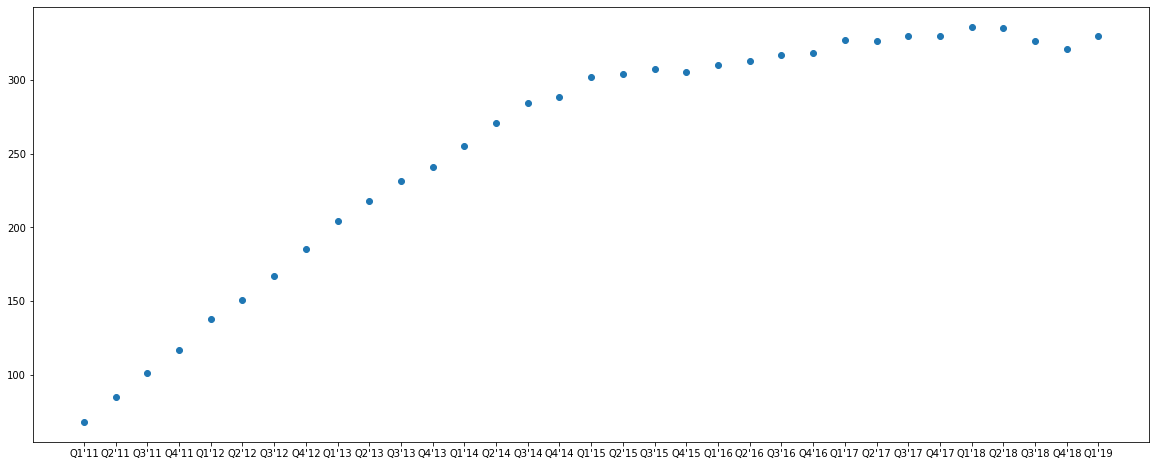

In [39]:
plt.figure(figsize=(20, 8))
plt.scatter(newTwitterMAU['quarter'],newTwitterMAU['MAU'])
plt.show()

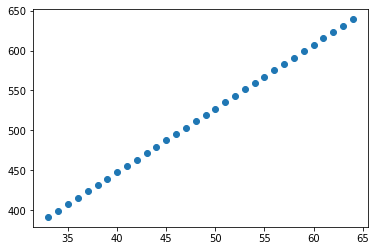

In [40]:
plt.scatter(x_test,y_pred)
plt.show()

<hr>

In [41]:
for i in range(2,5):
    mySeries = pd.Series([("Q"+str(i)+"'19"),y_pred[i-2]])
    newTwitterMAU = newTwitterMAU.append({"quarter":"Q"+str(i)+"'19", "MAU":int(y_pred[i-2])},ignore_index=True)

C:\Users\Dhanush\AppData\Local\Temp/ipykernel_16376/3373565889.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTwitterMAU = newTwitterMAU.append({"quarter":"Q"+str(i)+"'19", "MAU":int(y_pred[i-2])},ignore_index=True)
C:\Users\Dhanush\AppData\Local\Temp/ipykernel_16376/3373565889.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTwitterMAU = newTwitterMAU.append({"quarter":"Q"+str(i)+"'19", "MAU":int(y_pred[i-2])},ignore_index=True)
C:\Users\Dhanush\AppData\Local\Temp/ipykernel_16376/3373565889.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTwitterMAU = newTwitterMAU.append({"quarter":"Q"+str(i)+"'19", "MAU":int(y_pred[i-2])},ignore_index=True)


In [42]:
newTwitterMAU.reset_index()

,index,quarter,MAU,time
0,0,Q1'11,68.0,0.0
1,1,Q2'11,85.0,1.0
2,2,Q3'11,101.0,2.0
3,3,Q4'11,117.0,3.0
4,4,Q1'12,138.0,4.0
5,5,Q2'12,151.0,5.0
6,6,Q3'12,167.0,6.0
7,7,Q4'12,185.0,7.0
8,8,Q1'13,204.0,8.0
9,9,Q2'13,218.0,9.0


In [43]:
newTwitterMAU

,quarter,MAU,time
0,Q1'11,68.0,0.0
1,Q2'11,85.0,1.0
2,Q3'11,101.0,2.0
3,Q4'11,117.0,3.0
4,Q1'12,138.0,4.0
5,Q2'12,151.0,5.0
6,Q3'12,167.0,6.0
7,Q4'12,185.0,7.0
8,Q1'13,204.0,8.0
9,Q2'13,218.0,9.0


In [44]:
# get data from Q1'17 to Q4'19
TwMAU = newTwitterMAU.iloc[24:].copy().reset_index().iloc[:, 1:3]
TwDAU = tw.iloc[:16].copy().reset_index().iloc[:, 1:3]
Twitter = pd.merge(TwMAU, TwDAU, on="quarter")
Facebook = fb.iloc[3:15, :].copy().reset_index()[["quarter", "DAU", "MAU"]]

In [45]:
Twitter

,quarter,MAU,DAU
0,Q1'17,327.0,109
1,Q2'17,326.0,110
2,Q3'17,330.0,114
3,Q4'17,330.0,115
4,Q1'18,336.0,120
5,Q2'18,335.0,122
6,Q3'18,326.0,124
7,Q4'18,321.0,126
8,Q1'19,330.0,134
9,Q2'19,391,139


In [46]:
Facebook

,quarter,DAU,MAU
0,Q1'17,1.28,1.94
1,Q2'17,1.32,2.01
2,Q3'17,1.37,2.07
3,Q4'17,1.40,2.13
4,Q1'18,1.45,2.20
5,Q2'18,1.47,2.23
6,Q3'18,1.49,2.27
7,Q4'18,1.52,2.32
8,Q1'19,1.56,2.38
9,Q2'19,1.59,2.41


In [47]:
Twitter.to_csv("./TwitterC.csv")
Facebook.to_csv("./FacebookC.csv")

<BarContainer object of 12 artists>

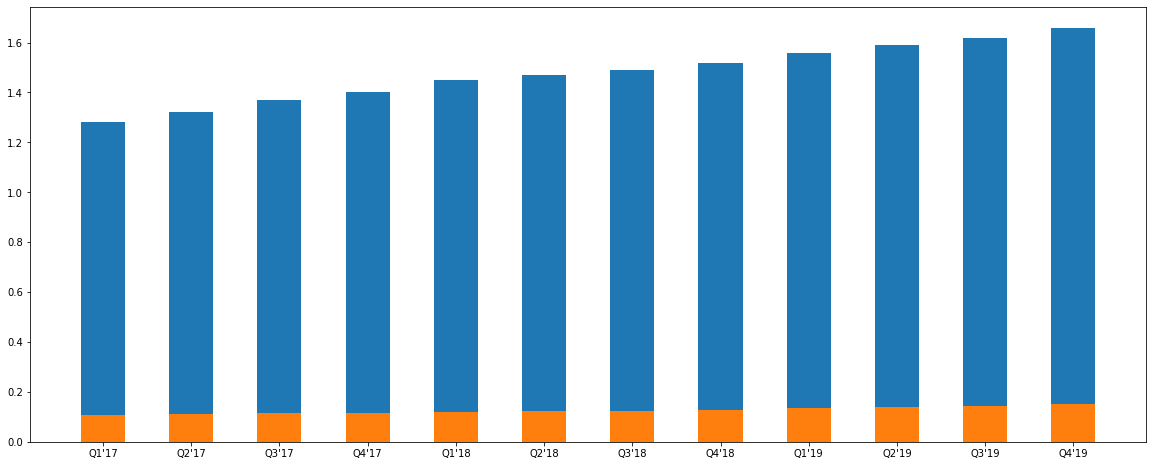

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
plt.bar(Facebook["quarter"], Facebook["DAU"], width=0.5)
plt.bar(Twitter["quarter"], Twitter["DAU"]/1000, width=0.5)

<BarContainer object of 12 artists>

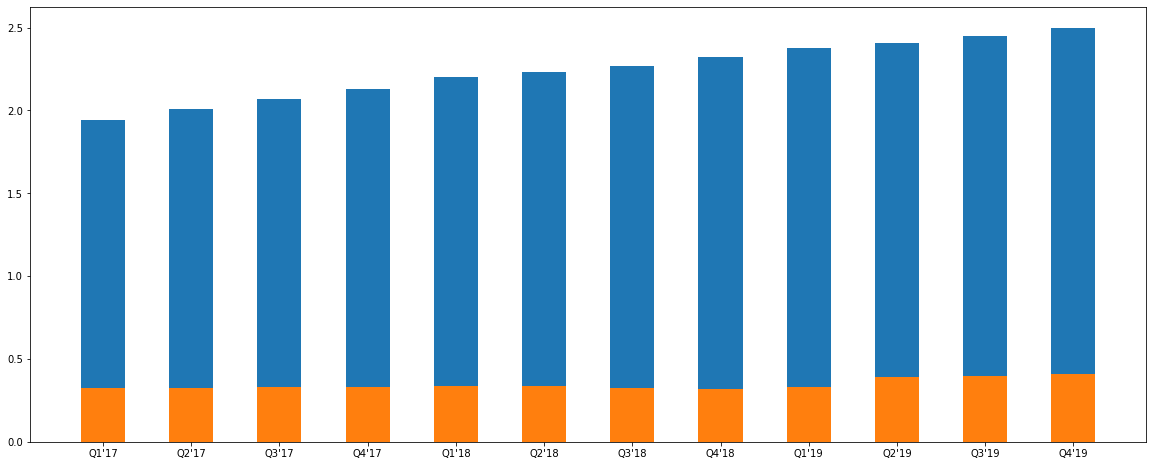

In [50]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
plt.bar(Facebook["quarter"], Facebook["MAU"], width=0.5)
plt.bar(Twitter["quarter"], Twitter["MAU"]/1000, width=0.5)

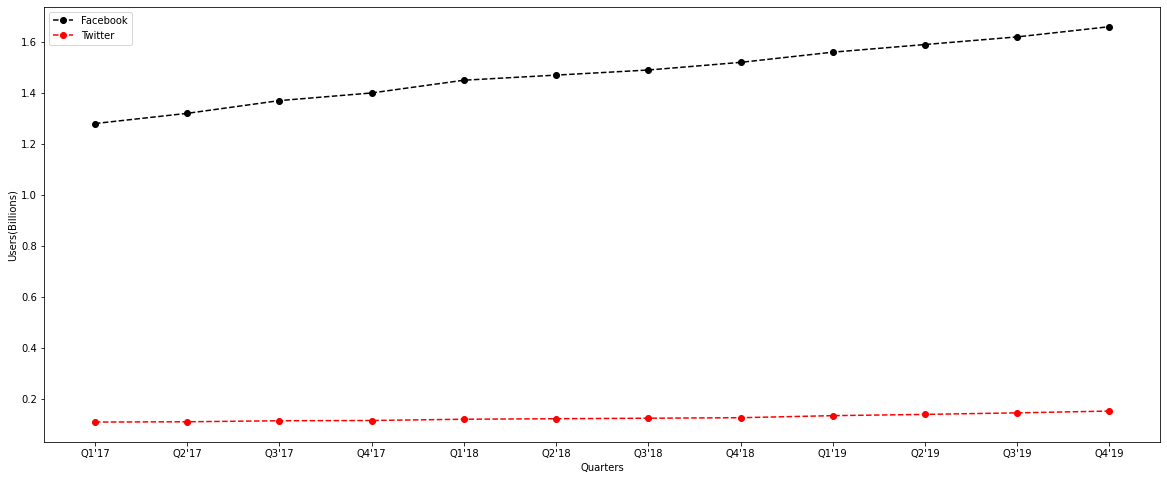

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
plt.plot(Facebook["quarter"], Facebook["DAU"], "k--o", label="Facebook")
plt.plot(Twitter["quarter"], Twitter["DAU"]/1000, "r--o", label="Twitter")
plt.xlabel("Quarters")
plt.ylabel("Users(Billions)")
plt.legend()

plt.show()

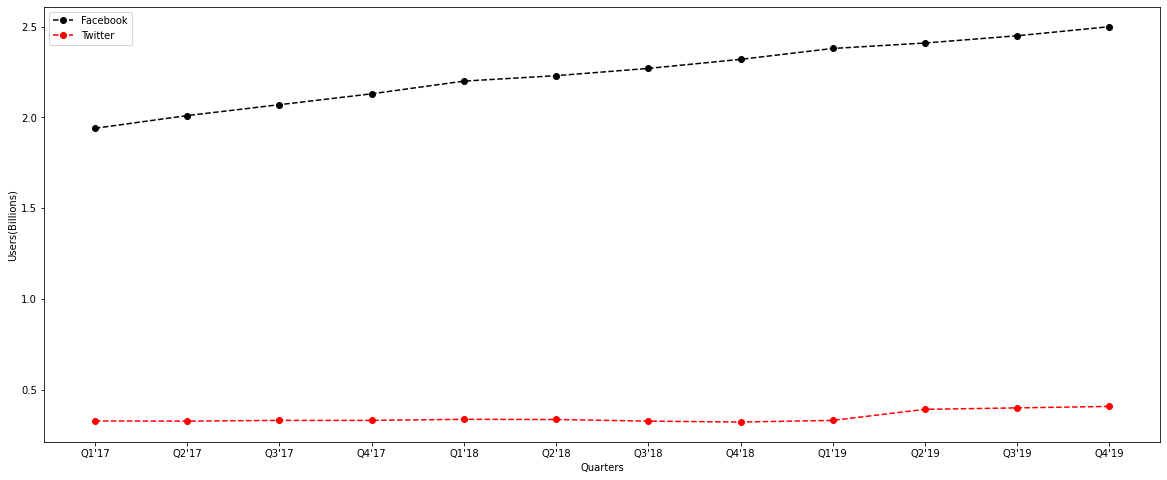

In [52]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
plt.plot(Facebook["quarter"], Facebook["MAU"], "k--o", label="Facebook")
plt.plot(Twitter["quarter"], Twitter["MAU"]/1000, "r--o", label="Twitter")
plt.xlabel("Quarters")
plt.ylabel("Users(Billions)")
plt.legend()

plt.show()

In [53]:
TwitterQoQ = Twitter.copy(deep=True)

initialMAU = Twitter["MAU"].iloc[0]
initialDAU = Twitter["DAU"].iloc[0]
TwitterQoQ["MAU"] = Twitter["MAU"].apply(lambda x: (x-initialMAU)/initialMAU)
TwitterQoQ["DAU"] = Twitter["DAU"].apply(lambda x: (x-initialDAU)/initialDAU)

TwitterQoQ.to_csv("./TwitterQoQ.csv")

TwitterQoQ

,quarter,MAU,DAU
0,Q1'17,0.000000,0.000000
1,Q2'17,-0.003058,0.009174
2,Q3'17,0.009174,0.045872
3,Q4'17,0.009174,0.055046
4,Q1'18,0.027523,0.100917
5,Q2'18,0.024465,0.119266
6,Q3'18,-0.003058,0.137615
7,Q4'18,-0.018349,0.155963
8,Q1'19,0.009174,0.229358
9,Q2'19,0.195719,0.275229


In [64]:
TwitterPoP = Twitter.copy(deep=True)

initialMAU = Twitter["MAU"].iloc[0]
initialDAU = Twitter["DAU"].iloc[0]

TwitterPoP["MAU"].iloc[0] = 0
TwitterPoP["DAU"].iloc[0] = 0

for i in range(1, len(Twitter.index)):
    TwitterPoP["MAU"].iloc[i] = (Twitter["MAU"].iloc[i]-Twitter["MAU"].iloc[i-1])/Twitter["MAU"].iloc[i-1]
    TwitterPoP["DAU"].iloc[i] = (Twitter["DAU"].iloc[i]-Twitter["DAU"].iloc[i-1])/Twitter["DAU"].iloc[i-1]

TwitterPoP.to_csv("./TwitterPoP.csv")

C:\Users\Dhanush\AppData\Local\Temp/ipykernel_16376/3566818646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TwitterPoP["MAU"].iloc[0] = 0
C:\Users\Dhanush\AppData\Local\Temp/ipykernel_16376/3566818646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TwitterPoP["DAU"].iloc[0] = 0
C:\Users\Dhanush\AppData\Local\Temp/ipykernel_16376/3566818646.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TwitterPoP["MAU"].iloc[i] = (Twit

In [53]:
FacebookQoQ = Facebook.copy(deep=True)

initialMAU = Facebook["MAU"].iloc[0]
initialDAU = Facebook["DAU"].iloc[0]
FacebookQoQ["MAU"] = Facebook["MAU"].apply(lambda x: (x-initialMAU)/initialMAU)
FacebookQoQ["DAU"] = Facebook["DAU"].apply(lambda x: (x-initialDAU)/initialDAU)

FacebookQoQ.to_csv("./FacebookQoQ.csv")

,quarter,DAU,MAU
0,Q1'17,0.000000,0.000000
1,Q2'17,0.031250,0.036082
2,Q3'17,0.070313,0.067010
3,Q4'17,0.093750,0.097938
4,Q1'18,0.132812,0.134021
5,Q2'18,0.148437,0.149485
6,Q3'18,0.164062,0.170103
7,Q4'18,0.187500,0.195876
8,Q1'19,0.218750,0.226804
9,Q2'19,0.242188,0.242268


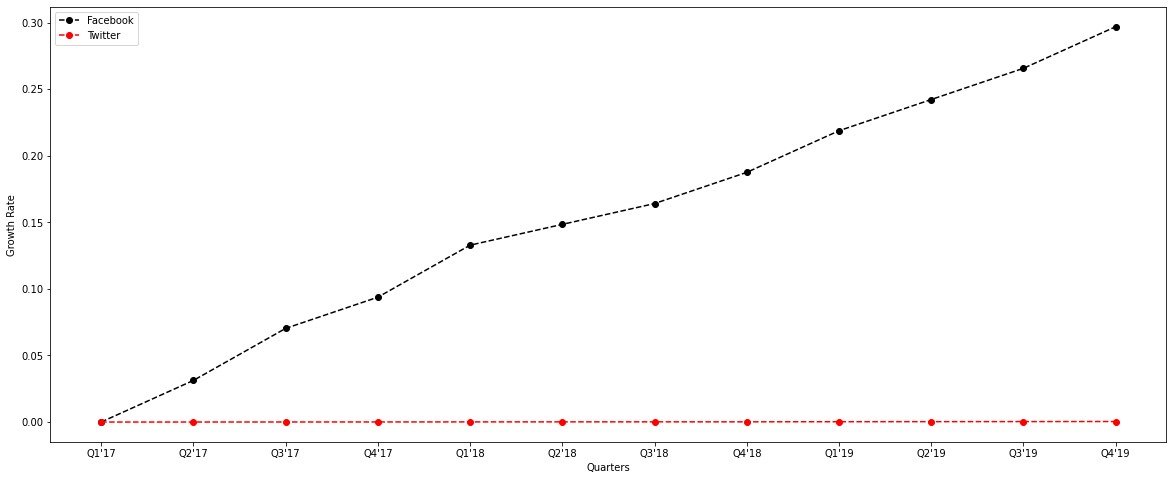

In [50]:
plt.figure(figsize=(20, 8))
plt.plot(FacebookQoQ["quarter"], FacebookQoQ["DAU"], "k--o", label="Facebook")
plt.plot(TwitterQoQ["quarter"], TwitterQoQ["DAU"]/1000, "r--o", label="Twitter")
plt.xlabel("Quarters")
plt.ylabel("Growth Rate")
plt.legend()

plt.show()

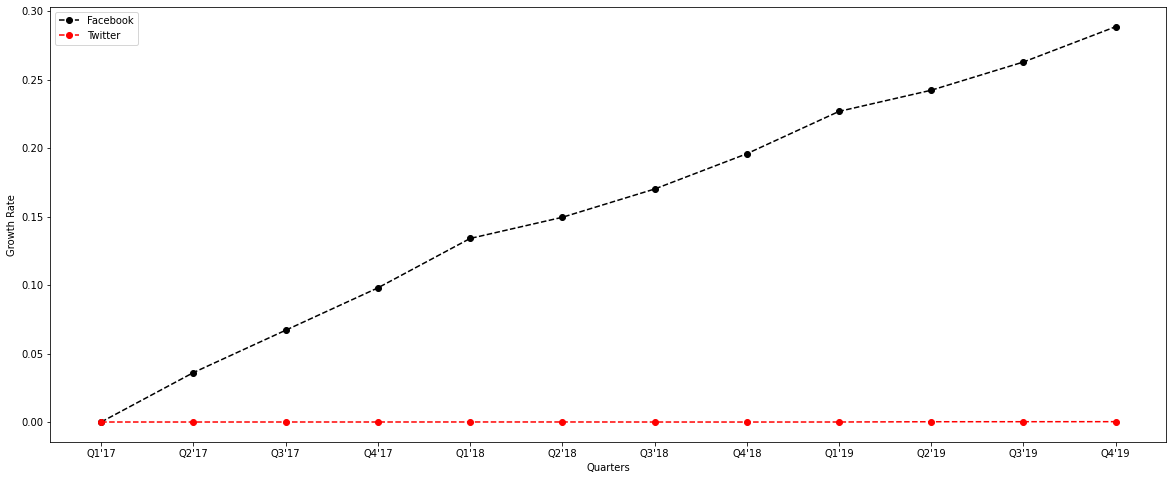

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(FacebookQoQ["quarter"], FacebookQoQ["MAU"], "k--o", label="Facebook")
plt.plot(TwitterQoQ["quarter"], TwitterQoQ["MAU"]/1000, "r--o", label="Twitter")
plt.xlabel("Quarters")
plt.ylabel("Growth Rate")
plt.legend()

plt.show()